![example](images/director_shot.jpeg)

# Project Title

**Authors:** Mark Bundi Kimathi
***

## Overview

The project's goal is to assist Microsoft's new movie studio in making informed decisions on the types of films to create in order to maximize box office success. The process involves an exploratory analysis of box office trends to identify profitable genres and translate those findings into actionable insights for the head of the movie studio.

## Business Problem

The business problem identified in the project is that Microsoft's new movie studio lacks the knowledge and expertise in creating movies, which puts them at a disadvantage in the competitive film industry. They need to make strategic decisions on the types of films to produce in order to maximize box office success and establish themselves as a significant player in the entertainment market.

***
Questions to consider:
* What are the business's pain points related to this project?

What are the Profitable Genres
  
* How did you pick the data analysis question(s) that you did?

Microsoft is looking for profit 
  
* Why are these questions important from a business perspective?
 
 Maximize profit
 Minimize Risk
  
***

## Data Understanding

Describe the data being used for this project.
***
The data analysed came from IMDb website. IMDb (an acronym for Internet Movie Database) is a popular worldwide online database of infomation relating to all movies, television programs, video games and streaming content online. I used 2 files from IMDb to answer the question of which genres were most successful, mainly focusing on the Domestic and Foreign Gross sales along with average ratings given and number of votes received.

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Here you run your code to explore the data

df_movie_ratings = pd.read_csv('title.ratings.csv')

df_title = pd.read_csv('title.basics.csv')

df_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
df_movie_ratings.sample(5)

,tconst,averagerating,numvotes
42751,tt2547332,7.2,5
17939,tt4686604,6.5,360
26406,tt3394878,5.6,72
62145,tt1796562,5.9,55
11321,tt3111680,5.3,250


In [12]:
df_movie_ratings.shape

(73856, 3)

In [14]:
df_title.shape

(146144, 6)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [42]:
# Here you run your code to clean the data
#Get data including the tiltle and ratings
df_joined_data = pd.merge(df_title,df_movie_ratings, on='tconst')
df_joined_data.head(4)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13


In [19]:
df_joined_data.shape

(73856, 8)

In [43]:
#Add data on Gross sales data

df_movie_gross = pd.read_csv('bom.movie_gross.csv')
df_movie_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [23]:
df_movie_gross.shape

(3387, 5)

In [57]:
#Rename column name to perform a join
df_movie_gross.rename(columns={'title':'primary_title'}, inplace=True)
df_movie_gross.columns

Index(['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [60]:
#Add Gross sales to our movie data
df_joined_data2 = pd.merge(df_joined_data,df_movie_gross, on='primary_title')
df_joined_data2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [64]:
df_joined_data2.shape

(3027, 12)

In [70]:
#Data used for Money Statistics
Gross_data = df_joined_data2[['primary_title','domestic_gross','foreign_gross','genres']].copy()

Gross_data.head()

,primary_title,domestic_gross,foreign_gross,genres
0,Wazir,1100000.0,NaN,"Action,Crime,Drama"
1,On the Road,744000.0,8000000,"Adventure,Drama,Romance"
2,On the Road,744000.0,8000000,Drama
3,On the Road,744000.0,8000000,Drama
4,The Secret Life of Walter Mitty,58200000.0,129900000,"Adventure,Comedy,Drama"


In [75]:
Gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 3026
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   2598 non-null   object 
 1   domestic_gross  2581 non-null   float64
 2   foreign_gross   1558 non-null   object 
 3   genres          2597 non-null   object 
dtypes: float64(1), object(3)
memory usage: 101.5+ KB


In [74]:
#Drop Duplicates Monney Data
Gross_data = Gross_data.drop_duplicates(subset='primary_title')
Gross_data.shape

(2598, 4)

In [89]:
#Data used for ratings
Ratings_data = df_joined_data
Ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ MB


In [95]:
#Drop Duplicates
Ratings_data = Ratings_data.drop_duplicates(subset='primary_title')

Ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69993 entries, 0 to 73854
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           69993 non-null  object 
 1   primary_title    69993 non-null  object 
 2   original_title   69993 non-null  object 
 3   start_year       69993 non-null  int64  
 4   runtime_minutes  62732 non-null  float64
 5   genres           69222 non-null  object 
 6   averagerating    69993 non-null  float64
 7   numvotes         69993 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.8+ MB


In [99]:
Ratings_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Genre Ranking

In [163]:
#Highest Rating Count
Result_rating = Ratings_data.groupby('genres')['averagerating'].mean()
Result_rating = Result_rating.sort_values(ascending = False).head()
Result_rating

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Game-Show                     9.0
Music,Mystery                 9.0
Name: averagerating, dtype: float64

In [156]:
Genres = ['Comedy Documentary Fantasy','Documentary Family Musical','Game-Show','History Sport','Music Mystery']
Rating = [9.4,9.3,9.2,9.0,9.0]

## Top 5 Highest Rated Genres
***
The Data Shows that the genres with the highest rating are:
* Comedy,Documentary,Fantasy  
* Documentary,Family,Musical     
* History,Sport                  
* Game-Show                      
* Music,Mystery                  
***

## Chart Showing Popular Genres by Rating


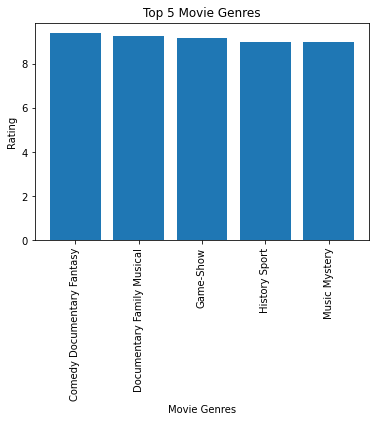

In [175]:
bar_chart_title = "Top 5 Movie Genres"

fig = np.array(Genres)
ax = np.array(Rating)

plt.bar(fig,ax)
plt.xticks(rotation='vertical')
plt.xlabel("Movie Genres")
plt.ylabel("Rating")
plt.title(bar_chart_title)

plt.show()

## Successful Genres 

In [191]:
Gross_data = Gross_data.dropna()

In [200]:
#Gross_data['foreign_gross'] = Gross_data['foreign_gross'].str.replace('[^\w\s]','')
#Gross_data['foreign_gross'] = Gross_data['foreign_gross'].apply(pd.to_numeric)

Gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 1 to 3026
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   1540 non-null   object 
 1   domestic_gross  1540 non-null   float64
 2   foreign_gross   1540 non-null   int64  
 3   genres          1540 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 60.2+ KB


In [239]:
s_domestic = Gross_data.groupby('genres')['domestic_gross'].sum()
s_domestic = s_domestic.sort_values(ascending=False).head()
s_domestic

genres
Action,Adventure,Sci-Fi       1.102250e+10
Adventure,Animation,Comedy    8.861138e+09
Action,Adventure,Fantasy      4.378787e+09
Action,Adventure,Comedy       3.122514e+09
Comedy                        2.181965e+09
Name: domestic_gross, dtype: float64

In [217]:
s_foreign = Gross_data.groupby('genres')['foreign_gross'].sum()
s_foreign = s_foreign.sort_values(ascending=False).head()
s_foreign

genres
Action,Adventure,Sci-Fi       16611423889
Adventure,Animation,Comedy    16585399999
Action,Adventure,Fantasy       8936100000
Action,Adventure,Comedy        6439700000
Action,Adventure,Thriller      4531900000
Name: foreign_gross, dtype: int64

The data shows that Action,Adventure,Sci-Fi are the most profitable genres in both domestic and foregn markets

## Graph for domestic market



## Chart showing top 5 comercially succesful genres in Foreign Market

In [221]:
x = ['Action,Adventure,Sci-Fi','Adventure,Animation,Comedy','Action,Adventure,Fantasy','Action,Adventure,Comedy','Action,Adventure,Thriller']
y = [16611423889,16585399999,8936100000,6439700000,4531900000]

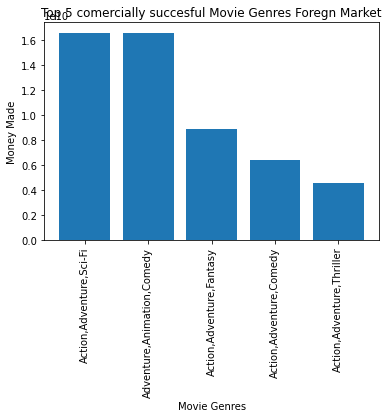

In [225]:
bar_chart_title = "Top 5 comercially succesful Movie Genres Foregn Market"

fig = np.array(x)
ax = np.array(y)

plt.bar(fig,ax)
plt.xticks(rotation='vertical')
plt.xlabel("Movie Genres")
plt.ylabel("Money Made")
plt.title(bar_chart_title)

plt.show()

## Chart showing top 5 comercially succesful genres in Domestic Market

In [242]:
x1 = ['Action,Adventure,Sci-Fi','Adventure,Animation,Comedy','Action,Adventure,Fantasy','Action,Adventure,Comedy','Comedy']
y2 = [11022500000,8861138000,4378787000,3122514000,2181965000]

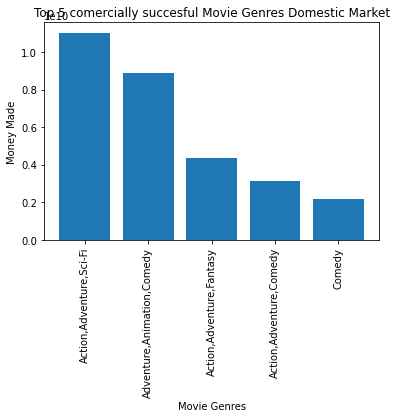

In [243]:
bar_chart_title = "Top 5 comercially succesful Movie Genres Domestic Market"

fig = np.array(x1)
ax = np.array(y2)

plt.bar(fig,ax)
plt.xticks(rotation='vertical')
plt.xlabel("Movie Genres")
plt.ylabel("Money Made")
plt.title(bar_chart_title)

plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Result
***
The above graphs show that thee highest rated Genres are:
* Comedy,Documentary,Fantasy  
* Documentary,Family,Musical     
* History,Sport                  
* Game-Show                      
* Music,Mystery                  
***

While the most economicaly successful genres in the foriegn and domestic markets are:
* Action,Adventure,Sci-Fi  
* Adventure,Animation,Comedy    
* Action,Adventure,Fantasy                  
* Action,Adventure,Comedy                     
* Action,Adventure,Thriller
* Comedy
***


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Conclusion
***
This analysis leads to three recommendations regarding types of movies that are successful:-

Movies with the genre combination Action, Adventure & Sci-Fi topped the leaderboard in both Domestic and Foreign Gross Sales, this combination is obviously a hit at the box office worldwide, make this the first type of movie to produce for success.

Movies with Adventure, Animation and Comedy were the next most successful in Foreign Gross Sales and Domestic Sales, use this combination as the next or alternative type of movie to produce.

The audiendce rating shows Comedy,Documentary,Fantasy got the highest ratings.

From the finding it is concluded that Adventure genre seems constant in all the above graphs so must be a key element of any movie to be produced.
